In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#add proportions into a dataframe table GROUP

def add_prop(group):
    births = group.numbers.astype(float)
    group['prop'] = births/births.sum()
    return group

In [3]:
#read data from https://www.ssa.gov/oact/babynames/limits.html

columns = ['name', 'gender', 'numbers']
names1880 = pd.read_csv('C:\\Users\\Dima\\Downloads\\names\\yob1880.txt', names = columns)

In [4]:
names1880.head()

,name,gender,numbers
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby('gender').numbers.sum()

gender
F     90992
M    110490
Name: numbers, dtype: int64

In [6]:
#concatenate data from all files into single dataframe table

years = range(1880,2016)

pieces = []

for year in years :
    path = 'C:\\Users\\Dima\\Downloads\\names\\yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame ['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index = True)

In [7]:
#pivot table for chart

total_numbers = names.pivot_table(names, index = ['year'], columns = 'gender', aggfunc = sum)
total_numbers.head()

numbers        
gender       F       M
year                  
1880     90992  110490
1881     91953  100743
1882    107848  113686
1883    112318  104627
1884    129020  114443

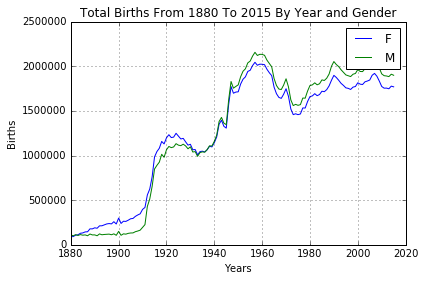

In [8]:
#plotting
def plotting(data, values, x, y, c_title) :
    plt.plot(data, values)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.title(c_title)
    plt.show()
    
plt.plot(years, total_numbers['numbers']['F'], years, total_numbers['numbers']['M'])
plt.xlabel('Years')
plt.ylabel('Births')
plt.grid(True) 
plt.title('Total Births From 1880 To 2015 By Year and Gender')
plt.legend(['F', 'M'])
plt.show()

In [9]:
names = names.groupby(['year', 'gender']).apply(add_prop)

In [10]:
names.head()

,name,gender,numbers,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


In [11]:
#check sum(prop) = 1 
np.allclose(names.groupby(['year','gender']).prop.sum(), 1)

True

In [12]:
#collect top 1000 names for each pair (gender, year) for work

def get_top1000(group):
    return group.sort_values(by = 'numbers', ascending = False)[:1000]

In [13]:
grouped = names.groupby(['year','gender'])
top1000 = grouped.apply(get_top1000)

In [14]:
#split data to boys-data and gorls-data

boys = top1000[top1000.gender == 'M']
girls = top1000[top1000.gender == 'F']

In [15]:
#group data for names

total_births = top1000.pivot_table(top1000, index = ['year'], columns = 'name', aggfunc = sum)
total_births.head()

numbers                                                         ...   \
name   Aaden Aaliyah Aanya Aarav  Aaron Aarush  Ab Abagail Abb Abbey ...    
year                                                                 ...    
1880     NaN     NaN   NaN   NaN  102.0    NaN NaN     NaN NaN   NaN ...    
1881     NaN     NaN   NaN   NaN   94.0    NaN NaN     NaN NaN   NaN ...    
1882     NaN     NaN   NaN   NaN   85.0    NaN NaN     NaN NaN   NaN ...    
1883     NaN     NaN   NaN   NaN  105.0    NaN NaN     NaN NaN   NaN ...    
1884     NaN     NaN   NaN   NaN   97.0    NaN NaN     NaN NaN   NaN ...    

          prop                                                              \
name       Zoa       Zoe Zoey Zoie      Zola    Zollie      Zona      Zora   
year                                                                         
1880  0.000088  0.000253  NaN  NaN  0.000077       NaN  0.000088  0.000308   
1881       NaN  0.000239  NaN  NaN  0.000109       NaN  0.000098  0.000228   
1882  0.000074  0.000232  NaN  NaN  0.000083       NaN  0.000158  0.000297   
1883       NaN  0.000205  NaN  NaN  0.000089       NaN  0.000098  0.000312   
1884  0.000101  0.000240  NaN  NaN  0.000109  0.000052  0.000062  0.000450   

                     
name      Zula Zuri  
year                 
1880  0.000297  NaN  
1881  0.000294  NaN  
1882  0.000195  NaN  
1883  0.000223  NaN  
1884  0.000209  NaN  

[5 rows x 14124 columns]

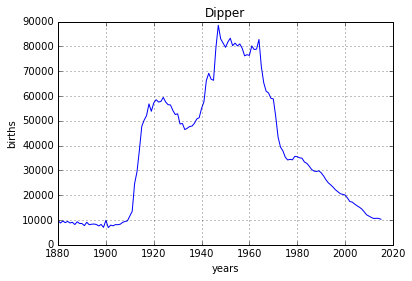

In [16]:
plotting(years, total_births['numbers']['John'], 'years', 'births', 'Dipper')

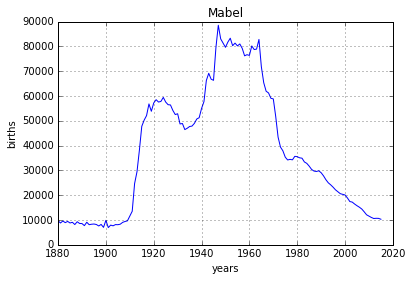

In [17]:
plotting(years, total_births['numbers']['John'], 'years', 'births', 'Mabel')

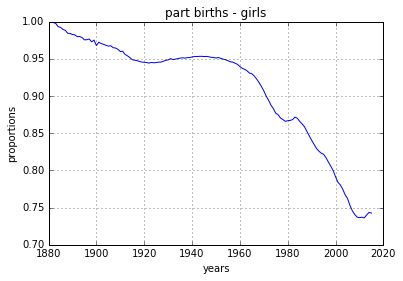

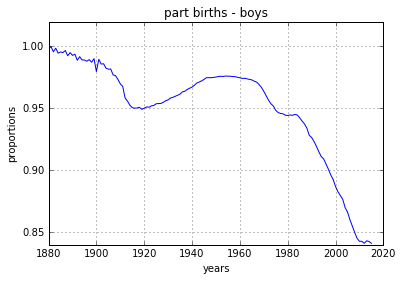

In [18]:
#name varety (how part of female names and male names changes)

table = top1000.pivot_table(top1000, index = ['year'], columns = 'gender', aggfunc = sum)
plotting(years, table['prop']['F'], 'years', 'proportions', 'part births - girls')
plotting(years, table['prop']['M'], 'years', 'proportions', 'part births - boys')

In [19]:
table.head()

numbers                prop          
gender         F         M         F         M
year                                          
1880     90992.0  110200.0  1.000000  0.997375
1881     91953.0  100743.0  1.000000  1.000000
1882    107708.0  113191.0  0.998702  0.995646
1883    112048.0  104477.0  0.997596  0.998566
1884    128137.0  113818.0  0.993156  0.994539

In [20]:
#position of 50% most popular names at 2010

df2010 = boys[boys.year == 2010]
prop_cumsum = df2010.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [21]:
#position of 50% most popular names at 1900

df1900 = boys[boys.year == 1900]
prop_cumsum = df1900.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

array([24], dtype=int64)

In [22]:
def get_quantile_count(group, q = 0.5) :
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().searchsorted(0.5) + 1

diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)
diversity = diversity.unstack('gender')

In [27]:
diversity['F'].head(10)

year
1880    [38]
1881    [38]
1882    [38]
1883    [39]
1884    [39]
1885    [40]
1886    [41]
1887    [41]
1888    [42]
1889    [43]
Name: F, dtype: object

In [30]:
plotting(years, diversity['F'], 'year', 'names', 'number of popular female names in top 50%')

In [29]:
plotting(years, diversity['M'], 'year', 'names', 'number of popular male names in top 50%')

In [53]:
#last letter revolution

get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last letter'

table = names.pivot_table(names, index = last_letters, columns = ['gender', 'year'], aggfunc = sum)

In [56]:
table.head()

numbers                                                        \
gender             F                                                         
year            1880     1881     1882     1883     1884     1885     1886   
last letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41912.0  48089.0  49616.0  53884.0   

                                          ...         prop            \
gender                                    ...            M             
year            1887     1888     1889    ...         2006      2007   
last letter                               ...                          
a            48942.0  59441.0  58631.0    ...     0.017644  0.016760   
b                NaN      NaN      NaN    ...     0.020780  0.020365   
c                NaN      NaN      NaN    ...     0.012990  0.012978   
d             1027.0   1298.0   1374.0    ...     0.025080  0.024465   
e            54352.0  66749.0  66662.0    ...     0.069735  0.069454   

                                                                         \
gender                                                                    
year             2008      2009      2010      2011      2012      2013   
last letter                                                               
a            0.016200  0.015953  0.015061  0.014467  0.014367  0.014517   
b            0.019667  0.019726  0.020489  0.019340  0.018327  0.017596   
c            0.012458  0.012192  0.012183  0.012194  0.012818  0.012745   
d            0.023583  0.023396  0.023388  0.022797  0.022427  0.022610   
e            0.069359  0.068643  0.067966  0.067909  0.067835  0.070012   

                                 
gender                           
year             2014      2015  
last letter                      
a            0.014740  0.015130  
b            0.016354  0.015460  
c            0.012424  0.012089  
d            0.022974  0.022909  
e            0.068909  0.067244  

[5 rows x 544 columns]

In [55]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()

numbers                                                   \
gender              F                            M                       
year             1910      1960      2010     1910      1960      2010   
last letter                                                              
a            108398.0  691271.0  676151.0    977.0    5212.0   28837.0   
b                 NaN     694.0     454.0    411.0    3912.0   39229.0   
c                 5.0      49.0     954.0    482.0   15463.0   23325.0   
d              6751.0    3728.0    2635.0  22113.0  262168.0   44780.0   
e            133601.0  435056.0  316425.0  28665.0  178817.0  130130.0   

                 prop                                                    
gender              F                             M                      
year             1910      1960      2010      1910      1960      2010  
last letter                                                              
a            0.273385  0.341854  0.381265  0.005030  0.002444  0.015061  
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020489  
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012183  
d            0.017026  0.001844  0.001486  0.113858  0.122925  0.023388  
e            0.336948  0.215148  0.178424  0.147593  0.083843  0.067966

In [77]:
#part of names with the letter among all names for each pair gender-year

subtable.sum()

         gender  year
numbers  F       1910     396503.0
                 1960    2022121.0
                 2010    1773440.0
         M       1910     194216.0
                 1960    2132756.0
                 2010    1914629.0
prop     F       1910          1.0
                 1960          1.0
                 2010          1.0
         M       1910          1.0
                 1960          1.0
                 2010          1.0
dtype: float64

In [78]:
letter_prop = subtable/subtable.sum().astype(float)
letter_prop['numbers'].head()

gender              F                             M                    
year             1910      1960      2010      1910      1960      2010
last letter                                                            
a            0.273385  0.341854  0.381265  0.005030  0.002444  0.015061
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020489
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012183
d            0.017026  0.001844  0.001486  0.113858  0.122925  0.023388
e            0.336948  0.215148  0.178424  0.147593  0.083843  0.067966

In [71]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
ch1 = letter_prop['numbers']['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
ch2 = letter_prop['numbers']['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', legend = False)
plt.show()

In [81]:
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop['numbers'].ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


In [83]:
dny_ts.plot()
plt.show()

In [85]:
# female names become male and conversely

all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])

lesley_like = all_names[mask]

In [91]:
lesley_like 

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [92]:
filtered = top1000[top1000.name.isin(lesley_like )]

In [95]:
filtered.groupby('name').numbers.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376034
Lesly      11431
Name: numbers, dtype: int64

In [98]:
table = filtered.pivot_table(filtered, index = 'year', columns = ['gender'], aggfunc = sum)
table = table.div(table.sum(1), axis = 0)
table['numbers'].tail()

gender,F,M
year,,
2011,0.999999,NaN
2012,0.999999,NaN
2013,0.999999,NaN
2014,0.999999,NaN
2015,0.999999,NaN


In [ ]:
table['numbers'].plot(style={'M': 'k-', 'F': 'k--'})
plt.show()